<a href="https://colab.research.google.com/github/stharashu/Breast-Cancer-Prediction-using-ML/blob/main/Logistic_Regression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

In [ ]:
#For training dataset
# Load the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
data_train = load_breast_cancer()

In [ ]:
# Training dataset
X_train, Y_train = data_train.data, data_train.target

# loading the data to a data frame
data_frame = pd.DataFrame(data_train.data, columns = data_train.feature_names)

# adding the 'target' column to the data frame
data_frame['label'] = data_train.target

# print the first 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
y_train=data_frame.label
#drop_cols=['Unnamed: 32','id','diagnosis']
x_train=data_frame
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Benign Tumours is  357
Malignant Tumours is  212


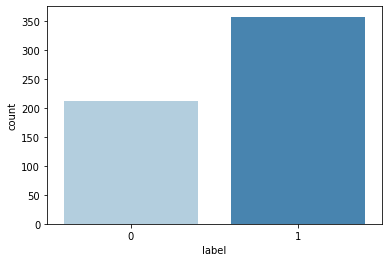

In [ ]:
#No. of benign and malignant in training dataset
ax=sns.countplot(y_train,label='Count',palette='Blues')
B,M=y_train.value_counts()
print("Benign Tumours is ", B)
print("Malignant Tumours is ", M)

In [ ]:
#For testing dataset

from google.colab import files
uploaded = files.upload()
df_test = pd.read_csv('dataset_testing.csv')

# Create a new column 'target' and map 'M' to 0 and 'B' to 1
df_test['target_variable_name'] = df_test['diagnosis'].apply(lambda x: 0 if x == 'M' else 1)

# Drop the 'diagnosis' column as it is no longer needed
df_test.drop('diagnosis', axis=1, inplace=True)

X_test = df_test.drop('target_variable_name', axis=1)
Y_test = df_test['target_variable_name']

Saving dataset_testing.csv to dataset_testing.csv


In [ ]:
df_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target_variable_name
0,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410,0
1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,0
2,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,31.48,136.80,1315.0,0.17890,0.42330,0.47840,0.20730,0.3706,0.11420,0
3,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615,0
4,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
123,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0
124,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,0
125,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146,0


In [ ]:
y_test=df_test.target_variable_name     #drop_cols=['Unnamed: 32','id','diagnosis']
x_test=df_test
x_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target_variable_name
0,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,0
1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216,0
2,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,0
3,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615,0
4,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.7,711.2,0.1440,0.1773,0.2390,0.1288,0.2977,0.07259,1


Benign Tumours is  76
Malignant Tumours is  51


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


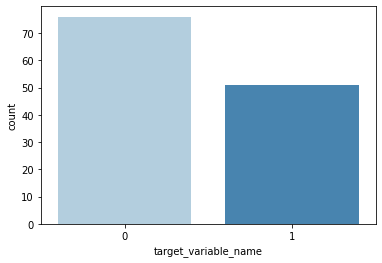

In [ ]:
#No. of benign and malignant in testing dataset
ax=sns.countplot(y_test,label='Count',palette='Blues')
B,M=y_test.value_counts()
print("Benign Tumours is ", B)
print("Malignant Tumours is ", M)

In [ ]:
# Split the data into features and target
X_train = data_frame.drop('label', axis=1)
Y_train = data_frame['label']

In [ ]:
print(X_train)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y_train)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [ ]:
# Split the data into features and target
X_test = df_test.drop('target_variable_name', axis=1)
Y_test = df_test['target_variable_name']

In [ ]:
print(X_test)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          14.54         27.54           96.73      658.8          0.11390   
1          14.68         20.13           94.74      684.5          0.09867   
2          16.13         20.68          108.10      798.8          0.11700   
3          19.81         22.15          130.00     1260.0          0.09831   
4          13.54         14.36           87.46      566.3          0.09779   
..           ...           ...             ...        ...              ...   
122        13.03         18.42           82.61      523.8          0.08983   
123        14.99         25.20           95.54      698.8          0.09387   
124        13.48         20.82           88.40      559.2          0.10160   
125        13.44         21.58           86.18      563.0          0.08162   
126        10.95         21.35           71.90      371.1          0.12270   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
print(Y_test)

0      0
1      0
2      0
3      0
4      1
      ..
122    1
123    0
124    0
125    0
126    0
Name: target_variable_name, Length: 127, dtype: int64


In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
df_test.groupby('target_variable_name').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target_variable_name,,,,,,,,,,,,,,,,,,,,,
0,16.451842,21.910921,108.664868,865.009211,0.104135,0.144650,0.152717,0.081679,0.196263,0.063670,...,19.902368,29.711184,133.553553,1255.988158,0.147077,0.397223,0.464731,0.177474,0.336704,0.095746
1,11.549627,17.883529,74.157843,420.611765,0.095868,0.080788,0.048362,0.025884,0.175853,0.064201,...,12.741902,23.700588,82.236863,508.319608,0.130173,0.177379,0.175742,0.072344,0.269675,0.079911


In [ ]:
print( X_train.shape, X_test.shape)


(569, 30) (127, 30)


In [ ]:
# Create a logistic regression model
model = LogisticRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_test.columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [ ]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,17.46,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410
1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216
2,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.17890,0.42330,0.47840,0.20730,0.3706,0.11420
3,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615
4,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
123,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
124,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,15.53,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710
125,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,15.93,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146


In [ ]:
# Make predictions on the testing data
predictions = model.predict(X_test)

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f"Accuracy on training data is {training_data_accuracy*100:.2f} %")

Accuracy on training data is 94.73 %


In [ ]:
# Calculate the accuracy of the model/ testing data
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy of the model is {accuracy*100:.2f}%")

Accuracy of the model is 91.34%


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print( f"Accuracy on test data is {test_data_accuracy*100:.2f} %")

Accuracy on test data is 91.34 %


In [ ]:
sample = X_test.iloc[0]
prediction = model.predict([sample])
print(f"The predicted target for sample {sample} is {prediction[0]}")

The predicted target for sample mean radius                 14.540000
mean texture                27.540000
mean perimeter              96.730000
mean area                  658.800000
mean smoothness              0.113900
mean compactness             0.159500
mean concavity               0.163900
mean concave points          0.073640
mean symmetry                0.230300
mean fractal dimension       0.070770
radius error                 0.370000
texture error                1.033000
perimeter error              2.879000
area error                  32.550000
smoothness error             0.005607
compactness error            0.042400
concavity error              0.047410
concave points error         0.010900
symmetry error               0.018570
fractal dimension error      0.005466
worst radius                17.460000
worst texture               37.130000
worst perimeter            124.100000
worst area                 943.200000
worst smoothness             0.167800
worst compactness 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[0]
The Breast cancer is Malignant


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (11.52,18.75,73.34,409,0.09524,0.05473,0.03036,0.02278,0.192,0.05907,0.3249,0.9591,2.183,23.47,0.008328,0.008722,0.01349,0.00867,0.03218,0.002386,12.84,22.47,81.81,506.2,0.1249,0.0872,0.09076,0.06316,0.3306,0.07036			)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast Cancer is Benign


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


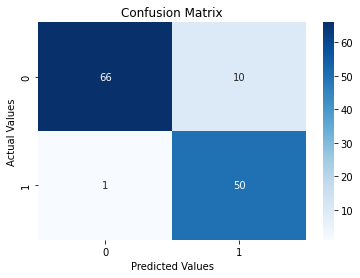

              precision    recall  f1-score   support

           0       0.99      0.87      0.92        76
           1       0.83      0.98      0.90        51

    accuracy                           0.91       127
   macro avg       0.91      0.92      0.91       127
weighted avg       0.92      0.91      0.91       127



In [ ]:

# Create a confusion matrix
cf_matrix_1 = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix_1, annot=True, cmap="Blues")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

# Calculate recall and precision
report = classification_report(y_test, predictions)
print(report)


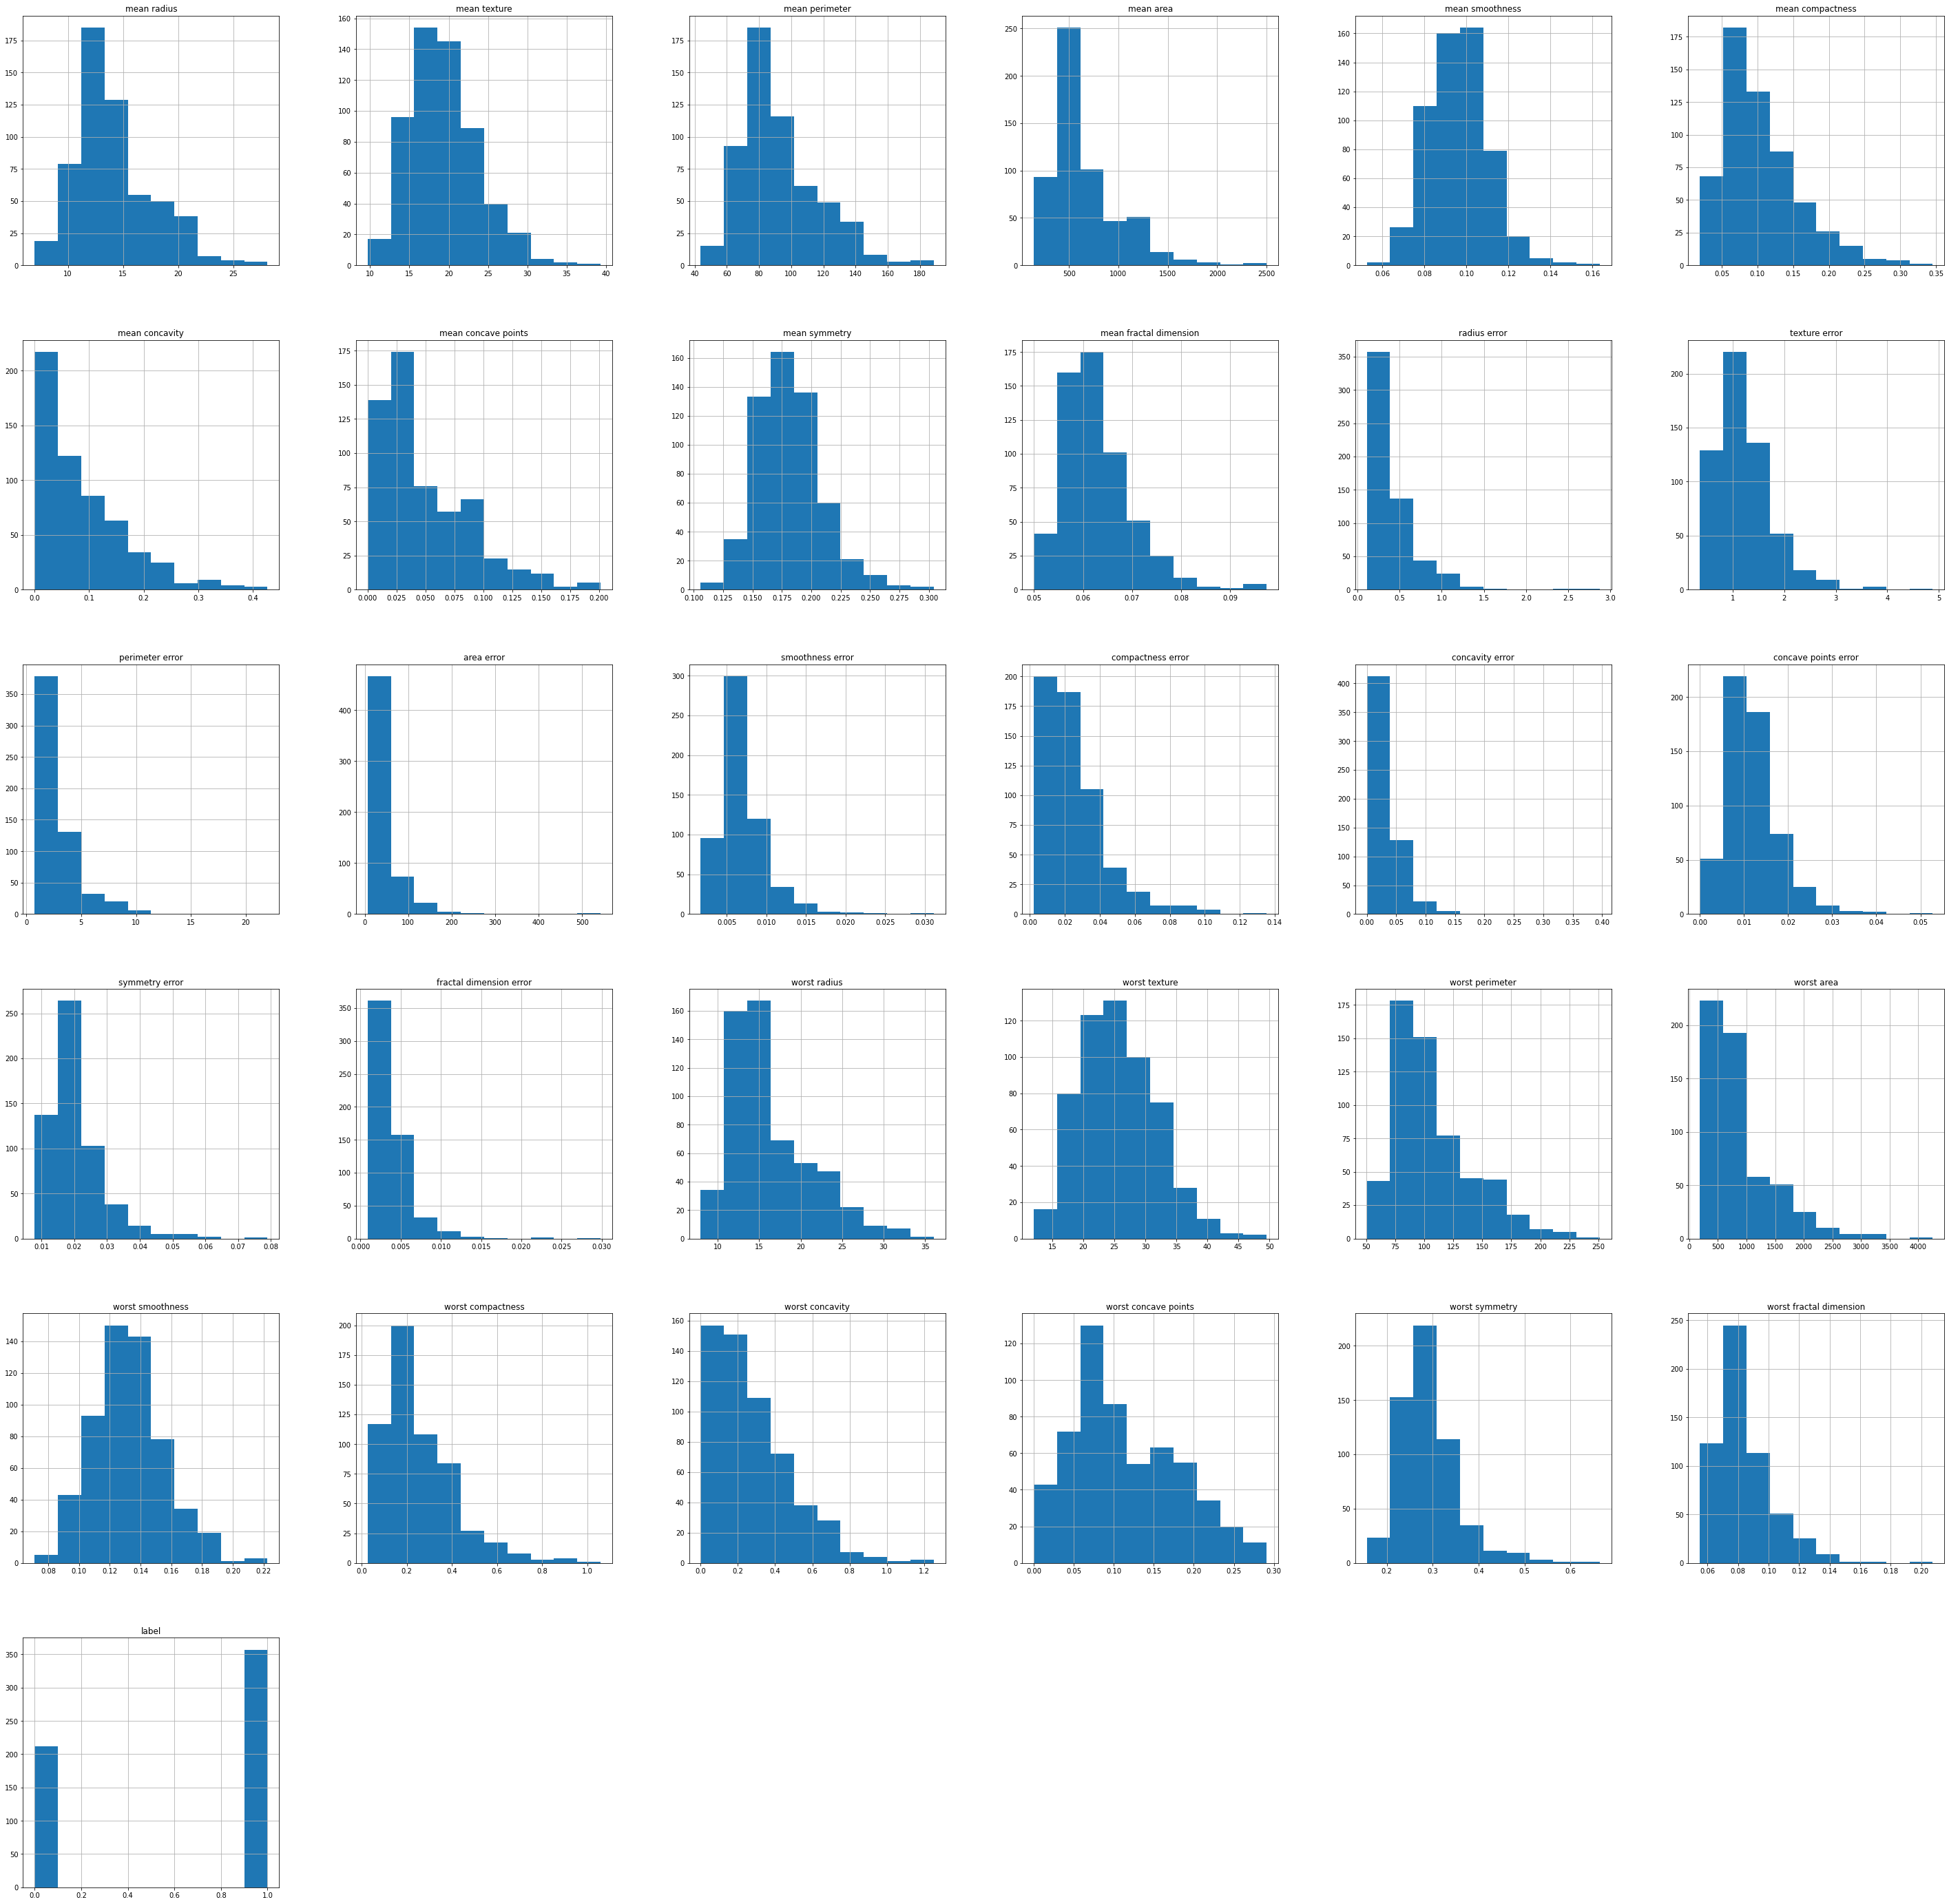

In [ ]:
# Plot histograms for each variable
data_frame.hist(figsize=(50, 50));

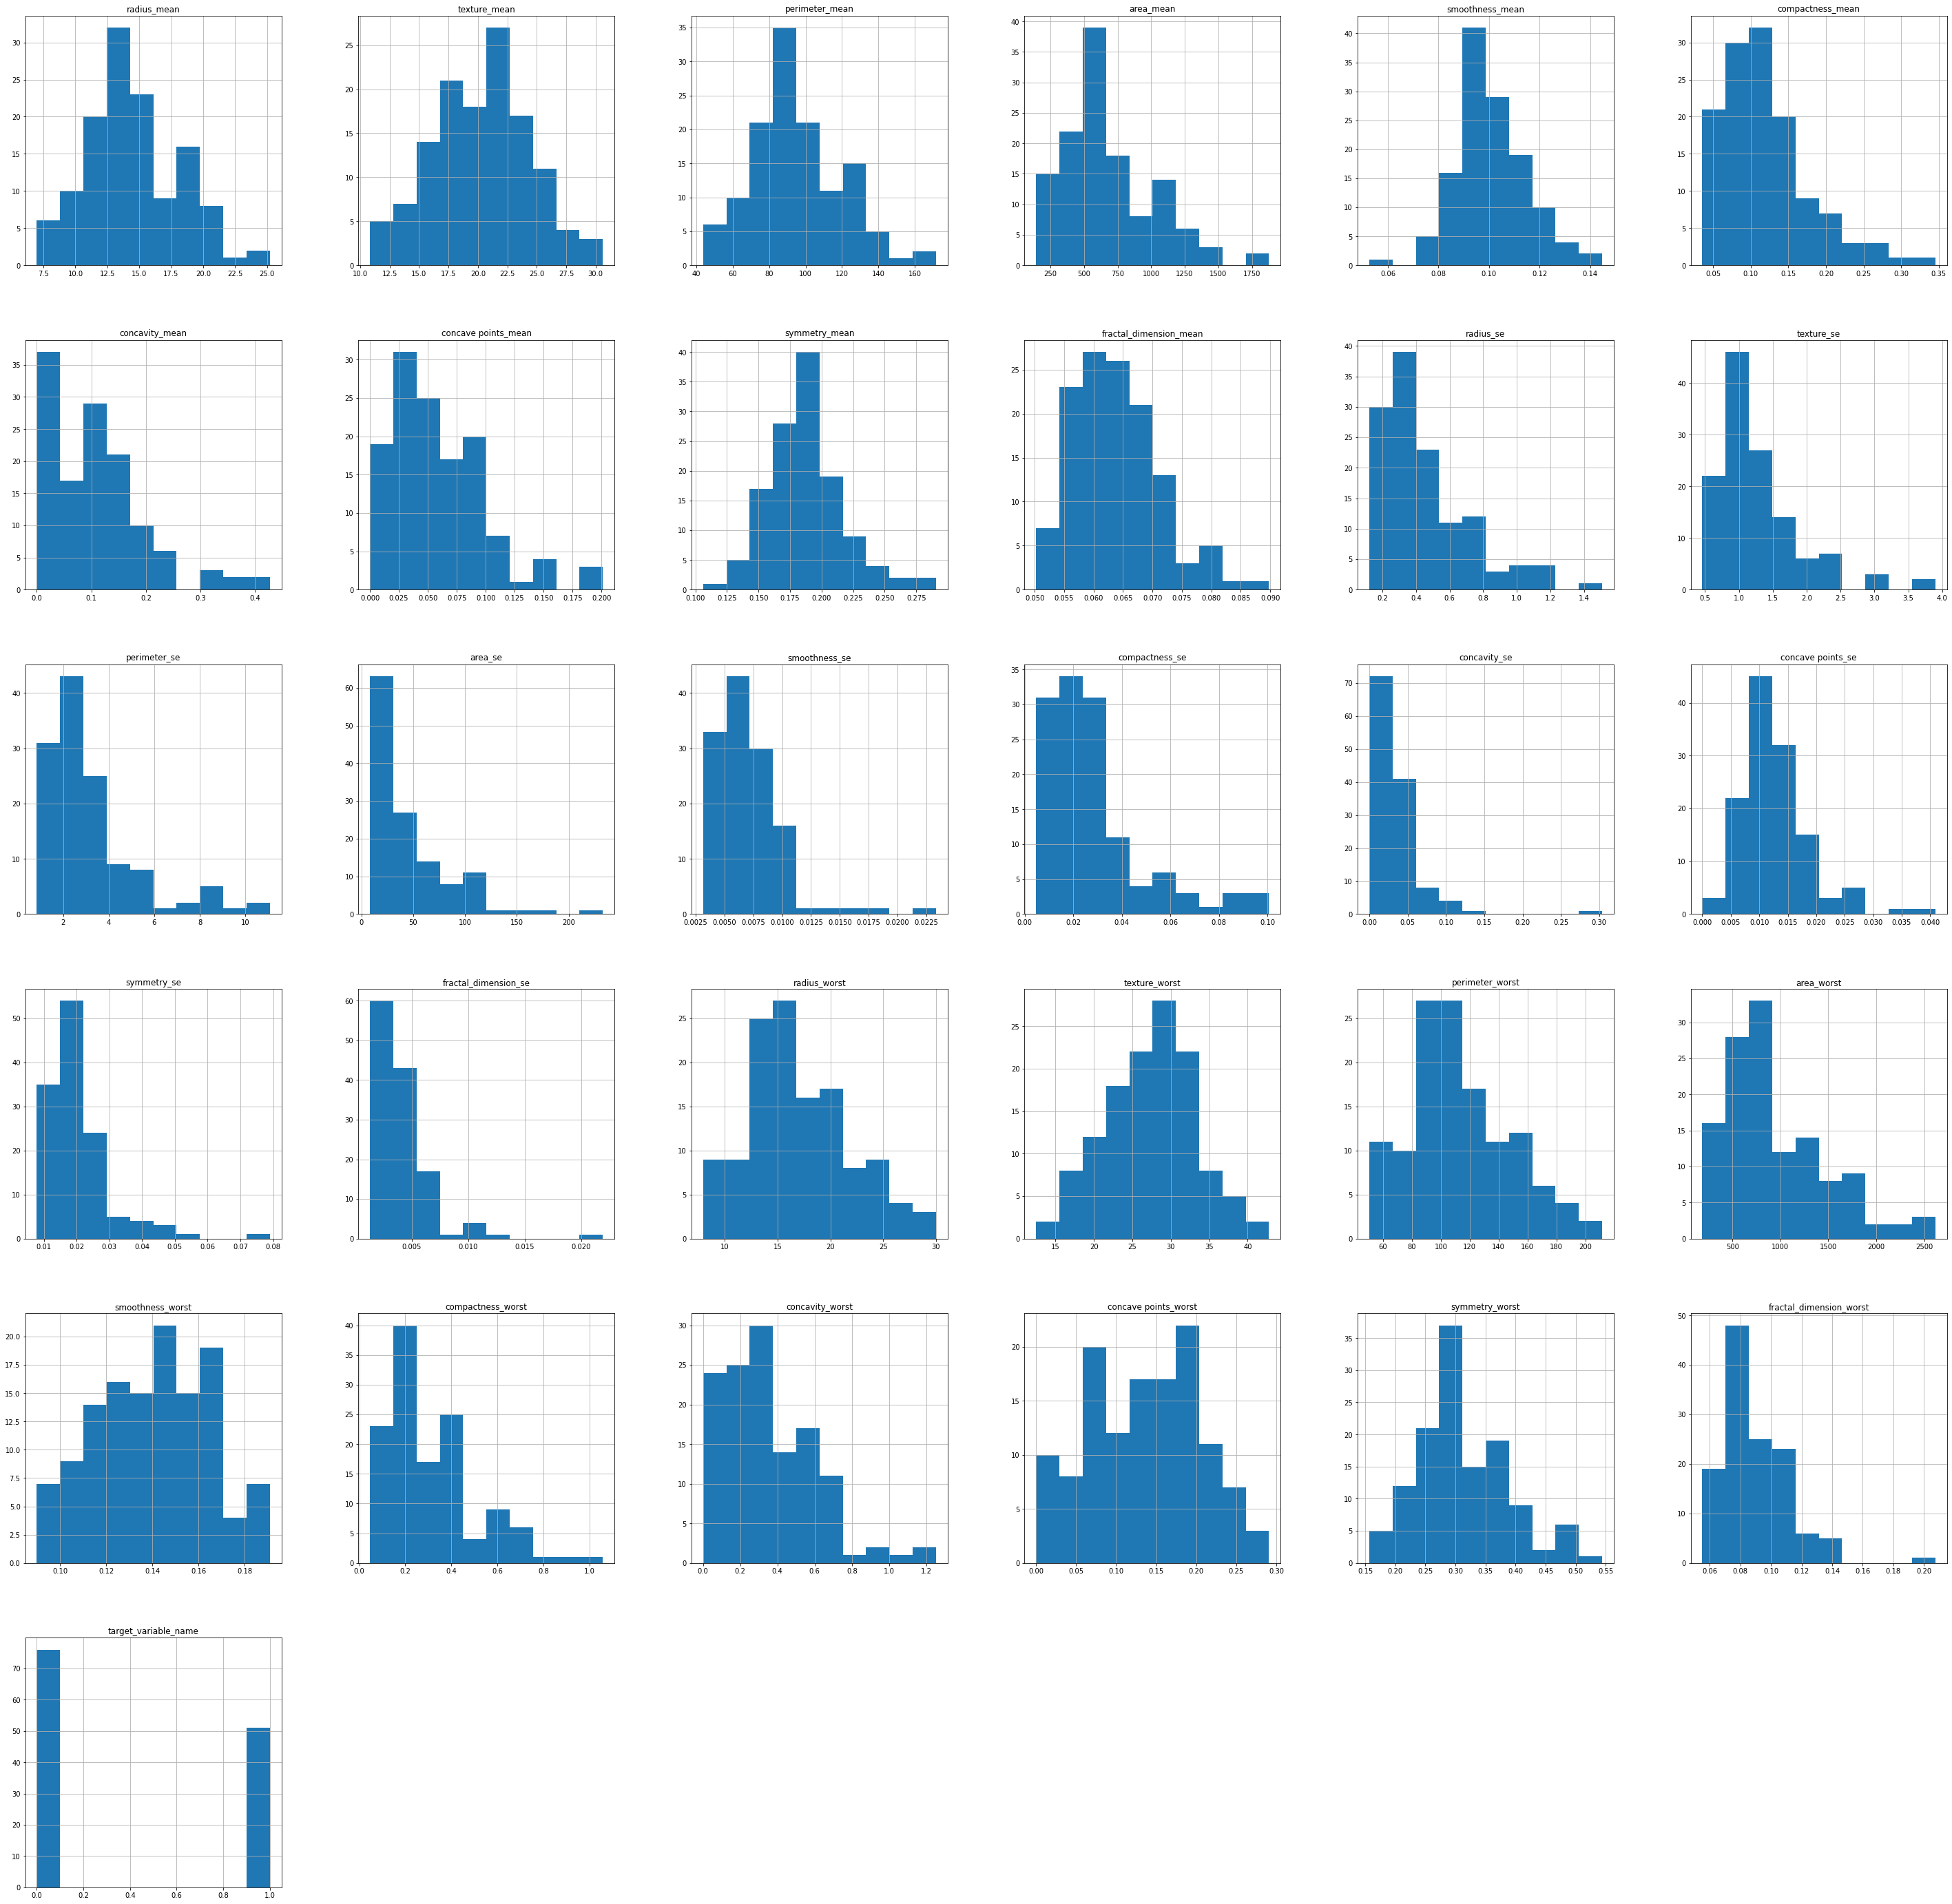

In [ ]:
# Plot histograms for each variable
df_test.hist(figsize=(50, 50));

In [ ]:
# Generate a random binary classification problem
X, Y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=0)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area_mean
- area_se
- area_worst
- compactness_mean
- compactness_se
- ...
Feature names seen at fit time, yet now missing:
- area error
- compactness error
- concave points error
- concavity error
- fractal dimension error
- ...

  warnings.warn(message, FutureWarn

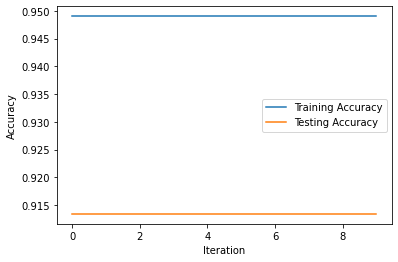

In [ ]:
# Visualize the model's performance over time
n_iterations = 10
training_data_accuracy = np.zeros(n_iterations)
test_data_accuracy = np.zeros(n_iterations)
for i in range(n_iterations):
    model.fit(X_train, Y_train)
    training_data_accuracy[i] = model.score(X_train, Y_train)
    test_data_accuracy[i] = model.score(X_test, Y_test)

plt.plot(range(n_iterations), training_data_accuracy, label="Training Accuracy")
plt.plot(range(n_iterations), test_data_accuracy, label="Testing Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area_mean
- area_se
- area_worst
- compactness_mean
- compactness_se
- ...
Feature names seen at fit time, yet now missing:
- area error
- compactness error
- concave points error
- concavity error
- fractal dimension error
- ...

  warnings.warn(message, FutureWarning)


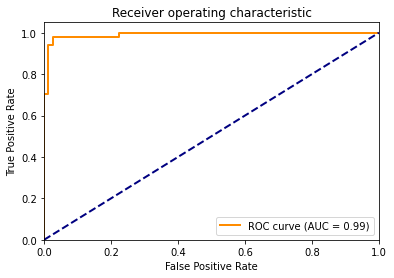

In [ ]:
from sklearn.metrics import roc_curve, auc

# predict probabilities of the test set
probs = clf.predict_proba(X_test)

# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, probs[:, 1])

# calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:>

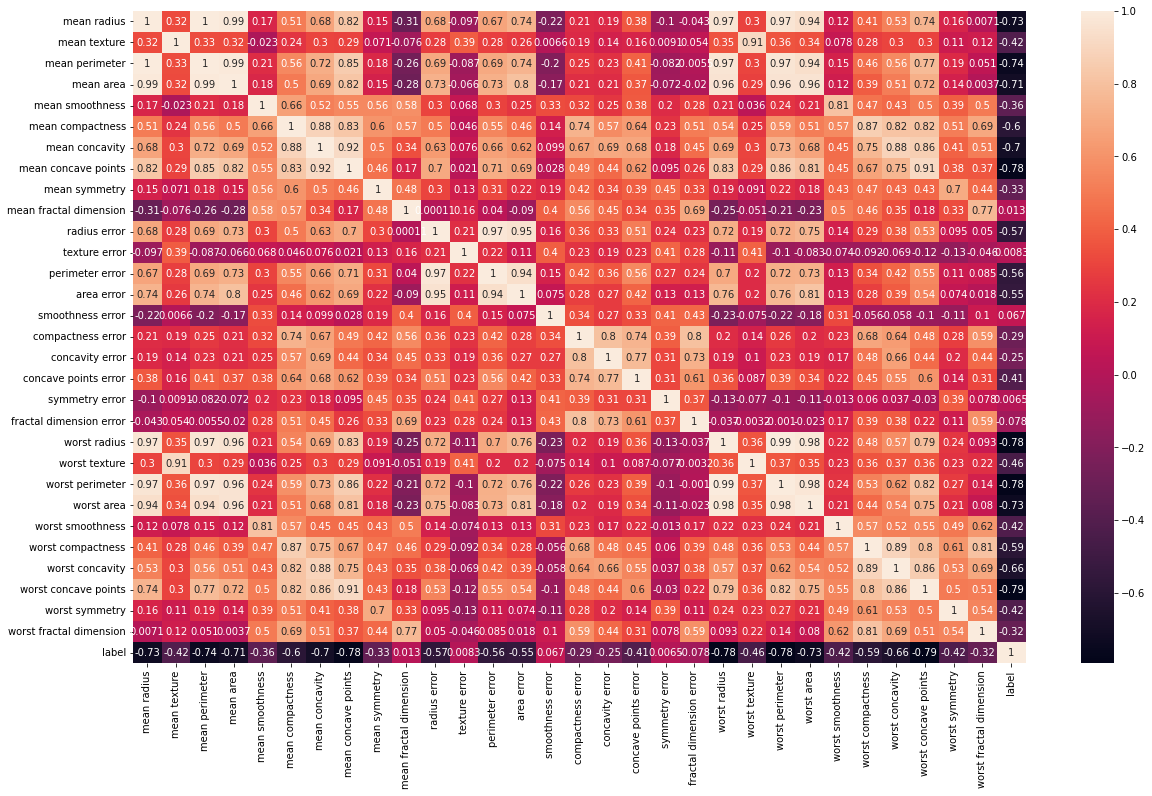

In [ ]:
#create heat map
plt.figure(figsize=(20,12))
sns.heatmap(data_frame.corr(), annot=True)

<AxesSubplot:>

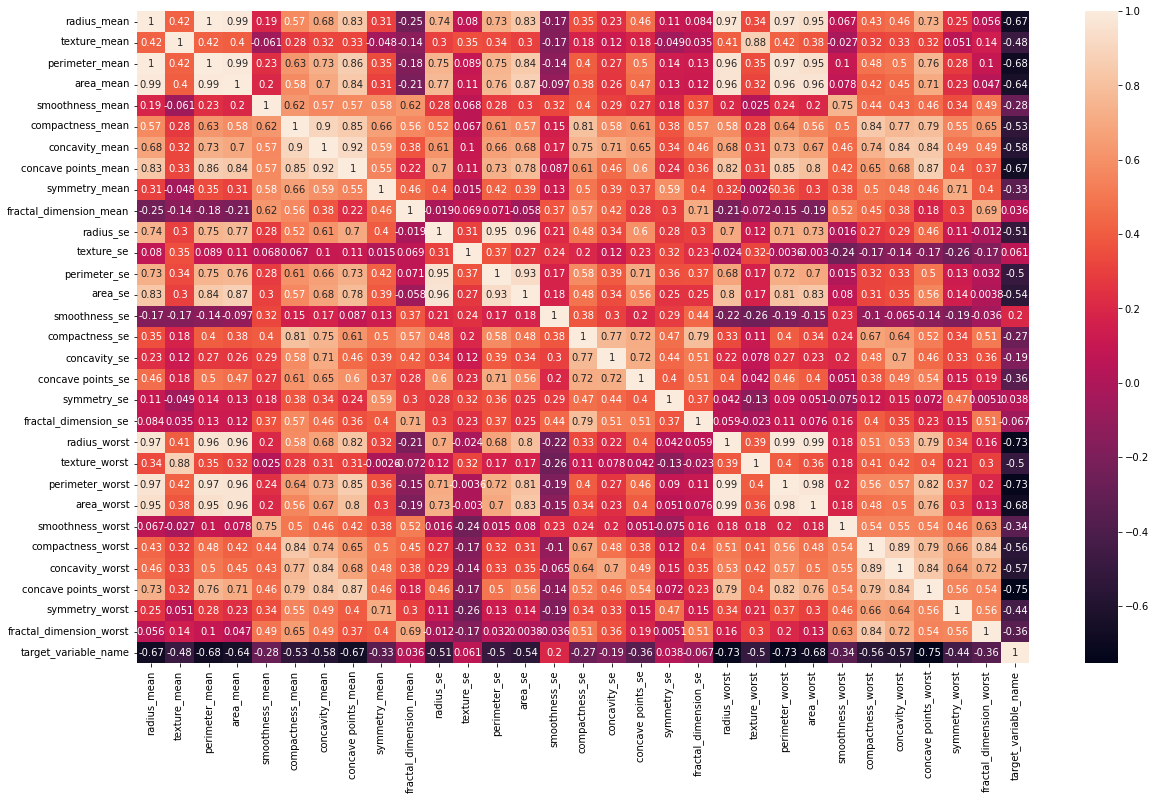

In [ ]:
#create heat map
plt.figure(figsize=(20,12))
sns.heatmap(df_test.corr(), annot=True)